In [1]:
# some calculation methods

In [3]:
import numpy as np
import math
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
# 画一条直线，在直线上方的是一类，在直线下方的是一类
# y = 2*x+1
def random_generate(mu1, sigma1, mu2, sigma2):
    r1 = np.random.normal(mu1, sigma1, 150)
    r2 = np.random.normal(mu2, sigma2, 150)
    s1 = 100*np.random.rand(150)+20
    s2 = (-100)*np.random.rand(150)-20
    x1 = 2*r1 + 1 + s1
    x2 = 2*r2 + 1 + s2
    y1 = [0]*150
    y2 = [1]*150
    df1 = pd.DataFrame({'x1':r1,'x2':x1,'y':y1})
    df2 = pd.DataFrame({'x1':r2,'x2':x2,'y':y2})
    df = df1.append(df2)
    return df

In [5]:
data = random_generate(3, 3, 5, 3)
print('data shape :', data.shape)

data shape : (300, 3)


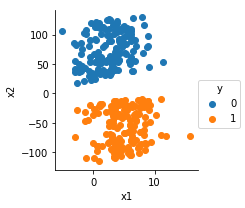

In [6]:
fg = sns.FacetGrid(data=data, hue='y', hue_order=[0,1])
fg.map(plt.scatter, 'x1', 'x2').add_legend()
plt.show()

In [7]:
data.head()

,x1,x2,y
0,-1.826300,75.931841,0
1,2.917144,35.074487,0
2,0.946941,119.295540,0
3,1.859075,30.767230,0
4,1.365962,60.651284,0


In [13]:
w = [1,1,1] #三维
a = 0.01
stop_condition = 0.00001

In [9]:
data[['x1','x2']].values

array([[ -1.82630044e+00,   7.59318405e+01],
       [  2.91714403e+00,   3.50744871e+01],
       [  9.46941334e-01,   1.19295540e+02],
       [  1.85907536e+00,   3.07672302e+01],
       [  1.36596151e+00,   6.06512842e+01],
       [  2.14121984e+00,   5.33768121e+01],
       [  1.60316316e+00,   1.12934979e+02],
       [  1.77771902e+00,   5.52352825e+01],
       [ -5.39118821e-01,   9.07602262e+01],
       [  2.65283247e+00,   5.77630268e+01],
       [  3.34641214e+00,   1.00673799e+02],
       [  6.29291905e+00,   3.86444564e+01],
       [  3.67327662e+00,   7.74550117e+01],
       [  2.52553497e+00,   9.72789275e+01],
       [  4.98973661e+00,   1.14364412e+02],
       [ -1.43272023e+00,   1.01895176e+02],
       [ -1.98500460e+00,   8.56850376e+01],
       [  2.67845938e+00,   3.16393903e+01],
       [  5.62599767e+00,   9.68221496e+01],
       [  3.96507609e+00,   1.04450889e+02],
       [  1.26256110e+00,   1.00091201e+02],
       [  9.70205889e-01,   6.06056756e+01],
       [  

In [12]:
x_t = np.concatenate((data[['x1', 'x2']].values, np.array([1] * len(data)).reshape((len(data), 1))), axis=1)
x_t

array([[ -1.82630044e+00,   7.59318405e+01,   1.00000000e+00],
       [  2.91714403e+00,   3.50744871e+01,   1.00000000e+00],
       [  9.46941334e-01,   1.19295540e+02,   1.00000000e+00],
       [  1.85907536e+00,   3.07672302e+01,   1.00000000e+00],
       [  1.36596151e+00,   6.06512842e+01,   1.00000000e+00],
       [  2.14121984e+00,   5.33768121e+01,   1.00000000e+00],
       [  1.60316316e+00,   1.12934979e+02,   1.00000000e+00],
       [  1.77771902e+00,   5.52352825e+01,   1.00000000e+00],
       [ -5.39118821e-01,   9.07602262e+01,   1.00000000e+00],
       [  2.65283247e+00,   5.77630268e+01,   1.00000000e+00],
       [  3.34641214e+00,   1.00673799e+02,   1.00000000e+00],
       [  6.29291905e+00,   3.86444564e+01,   1.00000000e+00],
       [  3.67327662e+00,   7.74550117e+01,   1.00000000e+00],
       [  2.52553497e+00,   9.72789275e+01,   1.00000000e+00],
       [  4.98973661e+00,   1.14364412e+02,   1.00000000e+00],
       [ -1.43272023e+00,   1.01895176e+02,   1.0000000

In [14]:
x_t*w*(-1)

array([[  1.82630044e+00,  -7.59318405e+01,  -1.00000000e+00],
       [ -2.91714403e+00,  -3.50744871e+01,  -1.00000000e+00],
       [ -9.46941334e-01,  -1.19295540e+02,  -1.00000000e+00],
       [ -1.85907536e+00,  -3.07672302e+01,  -1.00000000e+00],
       [ -1.36596151e+00,  -6.06512842e+01,  -1.00000000e+00],
       [ -2.14121984e+00,  -5.33768121e+01,  -1.00000000e+00],
       [ -1.60316316e+00,  -1.12934979e+02,  -1.00000000e+00],
       [ -1.77771902e+00,  -5.52352825e+01,  -1.00000000e+00],
       [  5.39118821e-01,  -9.07602262e+01,  -1.00000000e+00],
       [ -2.65283247e+00,  -5.77630268e+01,  -1.00000000e+00],
       [ -3.34641214e+00,  -1.00673799e+02,  -1.00000000e+00],
       [ -6.29291905e+00,  -3.86444564e+01,  -1.00000000e+00],
       [ -3.67327662e+00,  -7.74550117e+01,  -1.00000000e+00],
       [ -2.52553497e+00,  -9.72789275e+01,  -1.00000000e+00],
       [ -4.98973661e+00,  -1.14364412e+02,  -1.00000000e+00],
       [  1.43272023e+00,  -1.01895176e+02,  -1.0000000

In [20]:
def exp_function(a):
    return(1/(1+math.exp(a[0])*math.exp(a[1])*math.exp(a[2])))

In [21]:
y_guji = np.apply_along_axis(exp_function, 1, x_t*w*(-1))

In [22]:
def exp_function_1(a):
    return(1/(1+math.exp(np.sum(a))))

In [23]:
y_guji_1 = np.apply_along_axis(exp_function_1, 1, x_t*w*(-1))

In [30]:
y_guji

array([  1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,

In [42]:
data.y.values - y_guji

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.  

In [32]:
x_t[:,0]*(data.y.values + y_guji*(-1))

array([  1.82630044,  -2.91714403,  -0.94694133,  -1.85907536,
        -1.36596151,  -2.14121984,  -1.60316316,  -1.77771902,
         0.53911882,  -2.65283247,  -3.34641214,  -6.29291905,
        -3.67327662,  -2.52553497,  -4.98973661,   1.43272023,
         1.9850046 ,  -2.67845938,  -5.62599767,  -3.96507609,
        -1.2625611 ,  -0.97020589,  -3.41656544,  -6.79286382,
        -4.92883771,  -8.11601994,  -0.71829443,  -0.79748697,
        -6.20854999,  -5.11718794,   2.69853403,  -6.23205859,
        -1.20113392,   0.58555031,  -8.86625862,  -0.83108418,
        -8.79336622,   1.92631049,  -4.36775218,  -3.54869441,
        -8.86776799,   2.99099023,  -2.63283404,  -2.79726957,
         0.49455935,  -0.71694535,   0.73339758,  -4.6044251 ,
         0.56531867,  -0.25565493,  -4.9882883 ,  -0.52049425,
         1.36017117,  -1.8761763 ,  -3.30354228,  -4.86097186,
        -6.13829973,  -4.15321516,  -2.51338323,  -4.28118425,
         1.07237083,  -1.36927078,  -1.5706415 ,  -0.35

In [33]:
len(x_t[:,0]*(data.y.values + y_guji*(-1)))

300

In [34]:
np.sum(x_t[:,0]*(data.y.values + y_guji*(-1)))

335.75418986138556

In [35]:
np.sum(x_t[:,0]*(data.y.values + y_guji*(-1)))/len(data)*a

0.011191806328712852

In [40]:
w_dif = []
for i in range(len(w)):
    w_dif.append(np.sum(x_t[:,i]*(data.y.values + y_guji*(-1)))/len(data)*a)

In [41]:
w_dif

[0.011191806328712852, -0.65567034415351744, -6.2105595346165882e-05]